In [1]:
!pip install unrar
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=1f1ec428a5829817b448d9aa11cceabee836372ff8cee44ff85bd4c9d05bcd30
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, learning_curve, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score,mean_squared_error
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from scipy.linalg import pinv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [3]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar"
response = requests.get(URL)
open("divorce.rar", "wb").write(response.content)

33041

In [4]:
!unrar x divorce.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from divorce.rar

Extracting  divorce.csv                                                    6%  OK 
Extracting  divorce.xlsx                                                  99%  OK 
All OK


In [5]:
df = pd.read_csv('divorce.csv', skipinitialspace=True,index_col=False, delimiter=";")
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [6]:
y = df["Class"]
X = df.drop(['Class'], axis=1)
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
X_train

array([[-1.09492181, -1.12880539, -1.25043425, ..., -1.71014038,
        -0.82679007, -0.60850749],
       [-1.09492181, -1.12880539, -0.54185484, ..., -0.35161765,
        -0.16065589, -1.20993931],
       [ 0.75411834,  1.60282332,  0.87530398, ...,  1.00690508,
         1.17161246,  1.19578798],
       ...,
       [-0.4785751 , -1.12880539, -0.54185484, ..., -0.35161765,
        -0.16065589,  0.59435615],
       [ 1.37046505,  0.23700896,  0.87530398, ...,  1.00690508,
         1.17161246,  1.19578798],
       [ 1.37046505,  0.91991614,  0.87530398, ...,  1.00690508,
         0.50547829,  1.19578798]])

In [20]:
def apply_kmeans(X_in, y_in):
  clusters = list(range(2,170,10))
  sse = {}
  silh = {}
  homog = {}
  for cluster in clusters:
      kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=42).fit(X_in)
      sse[cluster] = kmeans.inertia_
      label = kmeans.labels_
      sil_coeff = silhouette_score(X_in, label, metric='euclidean')
      homog_score = homogeneity_score(y_in, label)
      silh[cluster] = sil_coeff
      homog[cluster] = homog_score
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("SSE")
  plt.title("SSE for KMean")
  plt.show()
  plt.figure()
  plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
  plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
  plt.legend()
  plt.title("KMean")
  plt.xlabel("Number of cluster")
  plt.ylabel("Silhouette Coefficient")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (152). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  import sys


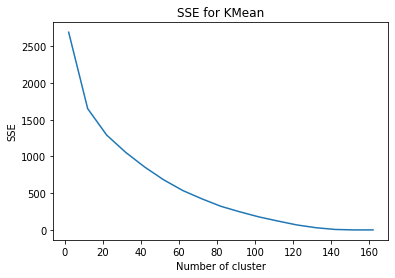

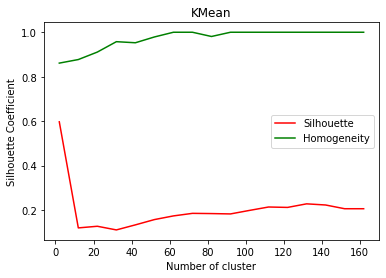

In [21]:
apply_kmeans(X, y)

For n_clusters = 2 The average silhouette_score is : 0.5969155461245153
For n_clusters = 3 The average silhouette_score is : 0.4931020826356653
For n_clusters = 4 The average silhouette_score is : 0.2506974555813306


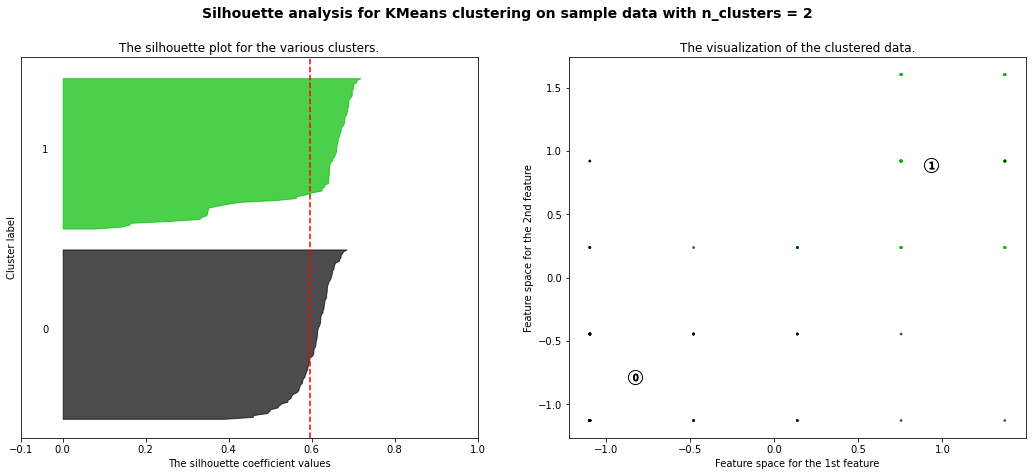

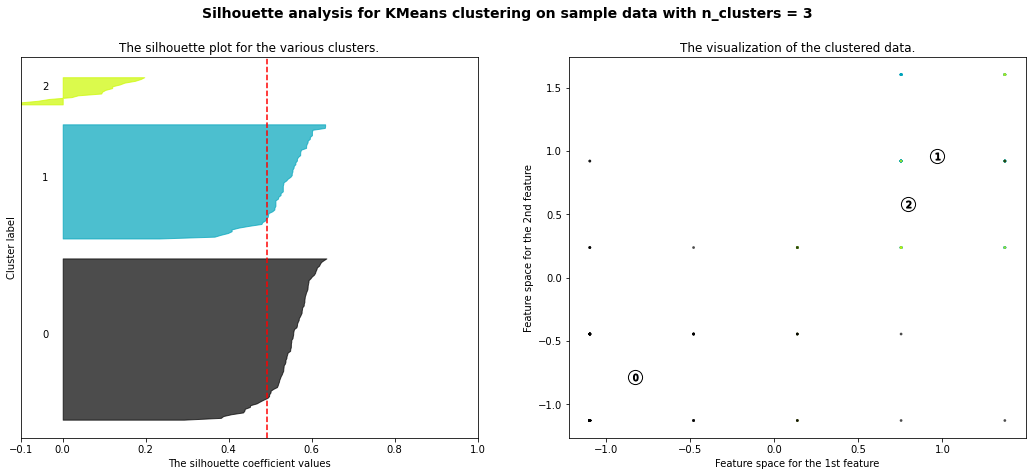

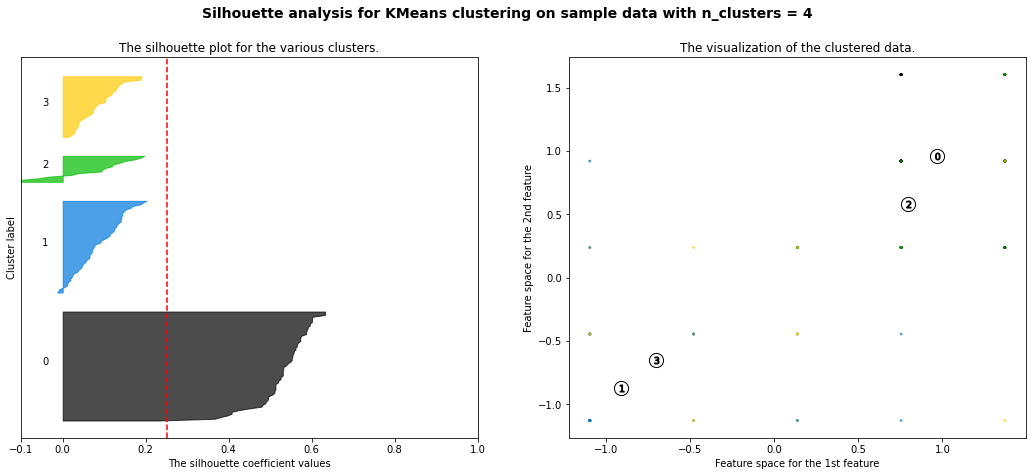

In [22]:
range_n_clusters = [2,3,4]

# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [23]:
def apply_EM(X_in, y_in):
  clusters = list(range(2,31,1))
  silh_EM = {}
  homog_EM = {}
  log_likelihood_EM = {}
  aic_scores = {}
  bic_scores = {}
  for cluster in clusters:
      gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=42, covariance_type='diag',
                            n_init=5).fit(X_in)
      label = gmm.predict(X_in)
      sil_coeff = silhouette_score(X_in, label, metric='euclidean')
      homog_score = homogeneity_score(y_in, label)
      silh_EM[cluster] = sil_coeff
      homog_EM[cluster] = homog_score
      log_likelihood_EM[cluster] = gmm.score(X_in)
      aic_scores[cluster] = gmm.aic(X_in)
      bic_scores[cluster] = gmm.bic(X_in)
      
  plt.figure()
  plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
  plt.xlabel("Number of cluster")
  plt.ylabel("Silhouette Coefficient")
  plt.title("EM")

  plt.show()
  plt.figure()
  plt.plot(list(silh_EM.keys()), list(silh_EM.values()), 'r', label="Silhouette")
  plt.plot(list(homog_EM.keys()), list(homog_EM.values()), 'g', label="Homogeneity")

  plt.legend()
  plt.title("EM")

  plt.xlabel("Number of cluster")
  plt.ylabel("Silhouette Coefficient")
  plt.show()

  plt.figure()
  plt.plot(list(aic_scores.keys()), list(aic_scores.values()), 'y', label="AIC")
  plt.plot(list(bic_scores.keys()), list(bic_scores.values()), 'b', label="BIC")

  plt.legend()
  plt.title("EM")

  plt.xlabel("Number of cluster")
  plt.ylabel("Model Complexity Score")

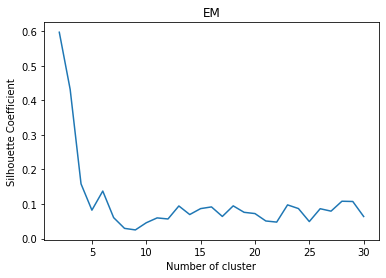

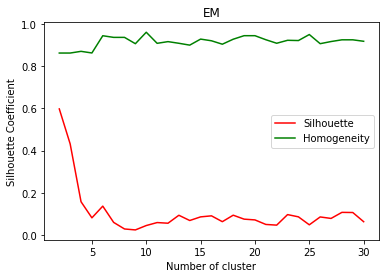

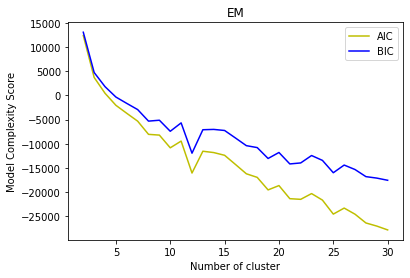

In [24]:
apply_EM(X, y)

In [25]:
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=42, 
                      n_init=1).fit(X)
label = gmm.predict(X)
metrics.f1_score(label, y,average='macro')

0.9764412416851441

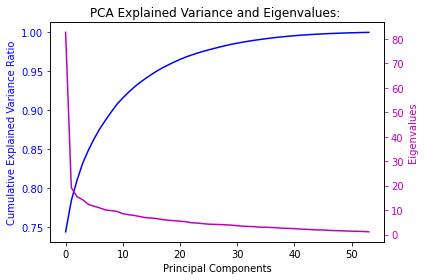

In [26]:
pca = PCA(random_state=42).fit(X)
cum_var = np.cumsum(pca.explained_variance_ratio_)

fig, ax1 = plt.subplots()
ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)

ax2 = ax1.twinx()
ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
ax2.set_ylabel('Eigenvalues', color='m')
ax2.tick_params('y', colors='m')
plt.grid(False)

plt.title("PCA Explained Variance and Eigenvalues: ")
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tole

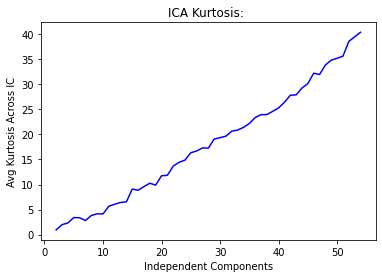

In [27]:
dims = list(np.arange(2,(X.shape[1]-1)))
dims.append(X.shape[1])
ica = FastICA(random_state=42)
kurt = []

for dim in dims:
  ica.set_params(n_components=dim)
  tmp = ica.fit_transform(X)
  tmp = pd.DataFrame(tmp)
  tmp = tmp.kurt(axis=0)
  kurt.append(tmp.abs().mean())

plt.figure()
plt.title("ICA Kurtosis: ")
plt.xlabel("Independent Components")
plt.ylabel("Avg Kurtosis Across IC")
plt.plot(dims, kurt, 'b-')
plt.grid(False)
plt.show()

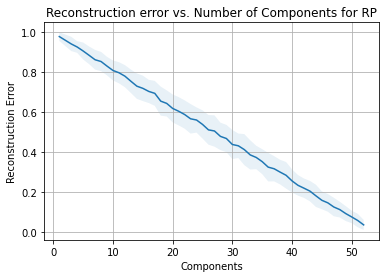

In [28]:
#Randomized Projections
reconstruction_error = []
reconstruction_variance = []
for i in range(1,53):
    mean_mse = []
    for j in range(0,100):
        rp = GaussianRandomProjection(n_components=i)
        X_RP = rp.fit(X)
        w = X_RP.components_
        p = pinv(w)
        reconstructed = ((p@w)@(X.T)).T
        mean_mse.append(mean_squared_error(X,reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
plt.plot(np.arange(1,53),reconstruction_error)
plt.fill_between(np.arange(1,53),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.1)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error vs. Number of Components for RP')
plt.grid()
plt.show()

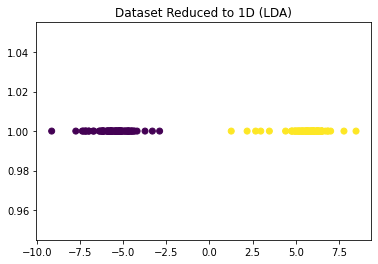

In [29]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X,y)
X_new = lda.transform(X)
plt.scatter(X_new[:, 0], np.array([1]* len(X_new[:,0])),marker='o',c=y)
# plt.scatter( np.array([1]* len(X_new[:,0])),X_new[:, 0],marker='o',c=y)

# plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y)
# plt.xlabel('LDA 1st Component')
# plt.ylabel('LDA 2nd Component')
plt.title('Dataset Reduced to 1D (LDA)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (160) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  import sys


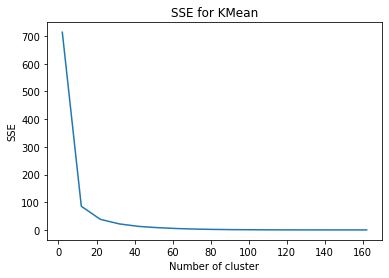

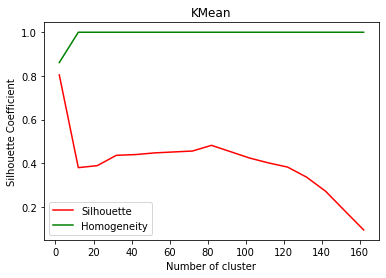

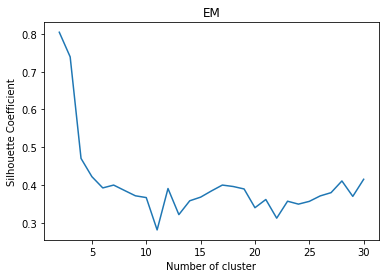

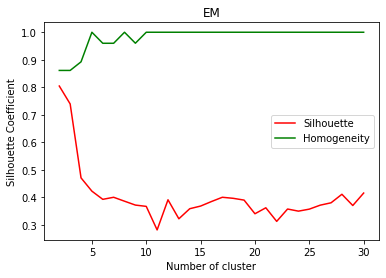

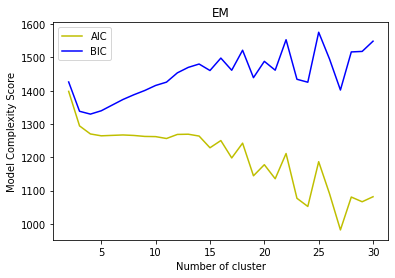

In [30]:
comp = 2
pca = PCA(n_components=comp, random_state=42)
X_pca = pca.fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

apply_kmeans(X_pca, y)
apply_EM(X_pca, y)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (152). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  import sys


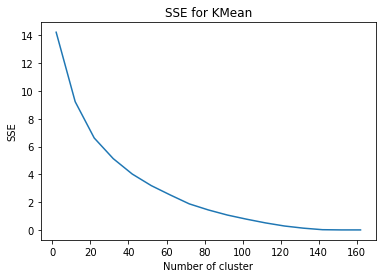

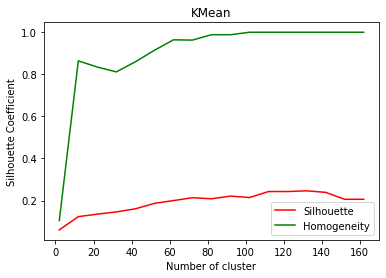

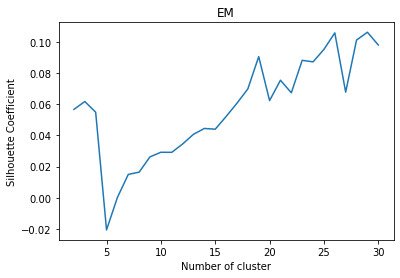

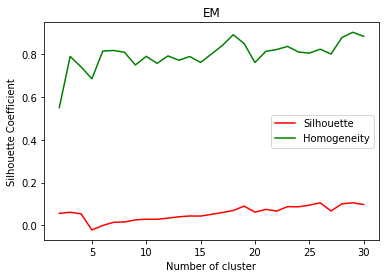

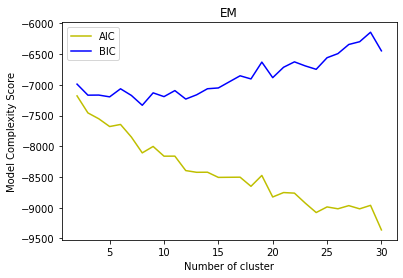

In [46]:
comp = 15
ica = FastICA(n_components=comp, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ica, y, test_size=0.3, random_state=42, stratify=y)

apply_kmeans(X_ica, y)
apply_EM(X_ica, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (152). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  import sys


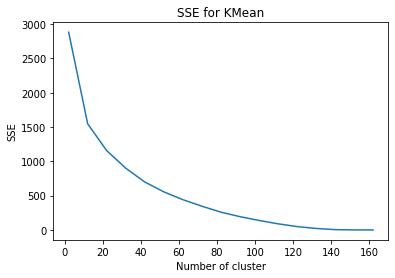

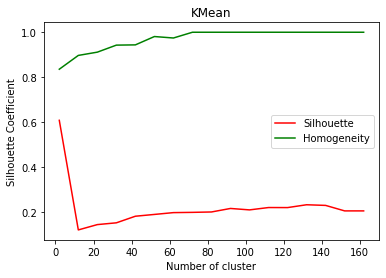

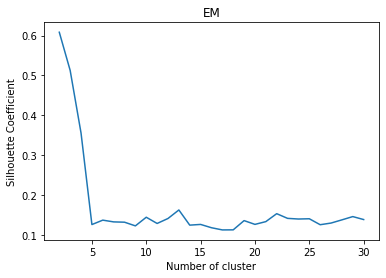

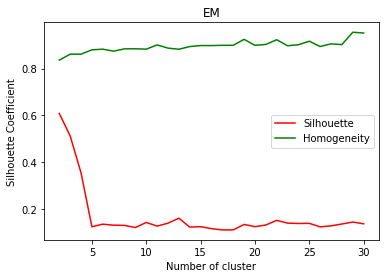

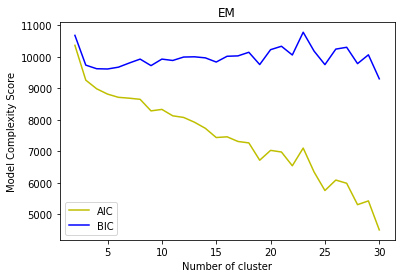

In [32]:
comp = 25
grp = GaussianRandomProjection(n_components=comp, random_state=42)
X_grp = grp.fit_transform(X)
X_GRP_train, X_GRP_test, y_GRP_train, y_GRP_test = train_test_split(X_grp, y, test_size=0.3, random_state=42, stratify=y)

apply_kmeans(X_grp, y)
apply_EM(X_grp, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (152). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (150) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  import sys


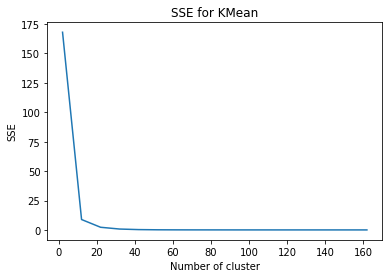

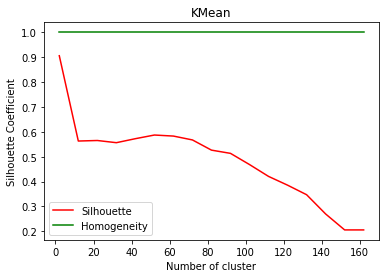

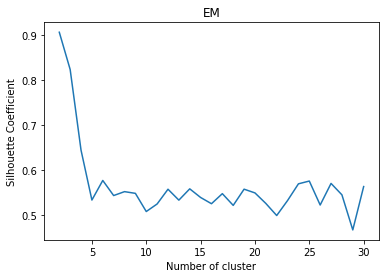

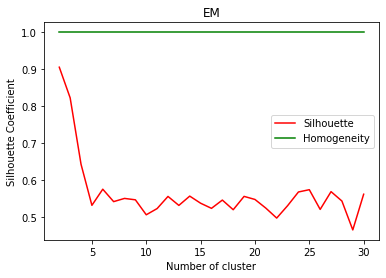

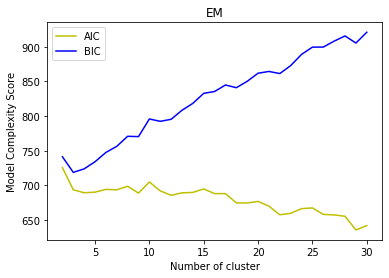

In [33]:
comp = 1
lda = LinearDiscriminantAnalysis(n_components=comp)
X_lda = lda.fit_transform(X,y)
X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_lda, y, test_size=0.3, random_state=42, stratify=y)

apply_kmeans(X_lda, y)
apply_EM(X_lda, y)

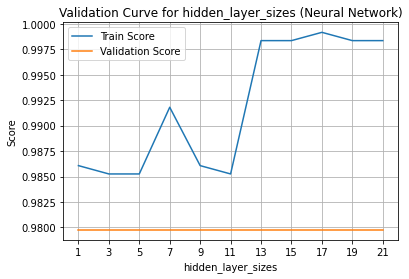

In [34]:
clf = MLPClassifier(hidden_layer_sizes=(3,3,),random_state=45, max_iter=2000)
hidden_layer_sizes_list = np.arange(1,23, 2)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=hidden_layer_sizes_list, param_name='hidden_layer_sizes', cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(hidden_layer_sizes_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(hidden_layer_sizes_list, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for hidden_layer_sizes (Neural Network)")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Score")
plt.xticks(hidden_layer_sizes_list)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

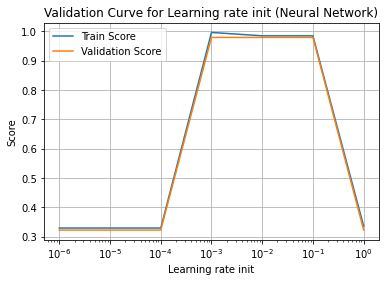

In [35]:
learning_rate_init_range = np.logspace(-6,0,7)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=learning_rate_init_range, param_name='learning_rate_init', cv=KFold(n_splits=10, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.semilogx(learning_rate_init_range, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(learning_rate_init_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Learning rate init (Neural Network)")
plt.xlabel("Learning rate init")
plt.ylabel("Score")
plt.xticks(learning_rate_init_range)
plt.grid()
plt.show()

In [36]:
def run_NeuralNetwork(X_in_train, X_in_test, y_in_train, y_in_test):
  clf = MLPClassifier(hidden_layer_sizes=(3,3,),random_state=45, max_iter=2000)
  hidden_layer_sizes_list = np.arange(1,23, 2)
  learning_rate_init_range = np.logspace(-6,0,7)

  param_grid = {'hidden_layer_sizes': hidden_layer_sizes_list, 'learning_rate_init': learning_rate_init_range}
  best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42))
  start_time = time.time()
  best_clf.fit(X_in_train, y_in_train)
  print("Best params for neural network:",best_clf.best_params_)
  end_time = time.time()
  time_train = end_time-start_time
  print("Time to fit:",end_time -start_time)

  start_time = time.time()
  f1_score = metrics.f1_score(y_in_test, best_clf.predict(X_in_test),average='macro')
  end_time = time.time()
  time_predict= end_time-start_time
  print("Time to predict:",end_time -start_time)
  print("F1_score for best neural network:",f1_score )

  #confusion matrix
  print("Confusion matrix for GridSearch best params:")
  print(confusion_matrix(y_in_test, best_clf.predict(X_in_test)))

  classifier_neural_network = MLPClassifier(hidden_layer_sizes=(best_clf.best_params_['hidden_layer_sizes'], ), random_state=42, max_iter=2000, learning_rate_init=best_clf.best_params_['learning_rate_init'])
  _, train_scores, test_scores = learning_curve(classifier_neural_network, X_in_train, y_in_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring="f1_macro")

  plt.figure()
  plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
  plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
  plt.legend()
  plt.title("Learning Curve (Neural Network)")
  plt.xlabel("Percentage of Training Examples")
  plt.ylabel("Score")
  plt.xticks(np.linspace(0.1,1.0,10)*100)
  plt.grid()
  plt.show()

  classifier_neural_network.fit(X_in_train, y_in_train)

  loss_curve = classifier_neural_network.loss_curve_
  plt.figure()
  plt.title("Loss Curve")
  plt.xlabel("Number of Iterations")
  plt.ylabel("Loss")
  plt.plot(loss_curve, 'o-')
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 1, 'learning_rate_init': 0.0001}
Time to fit: 93.39555048942566
Time to predict: 0.005469560623168945
F1_score for best neural network: 0.9705627705627706
Confusion matrix for GridSearch best params:
[[17  0]
 [ 1 16]]


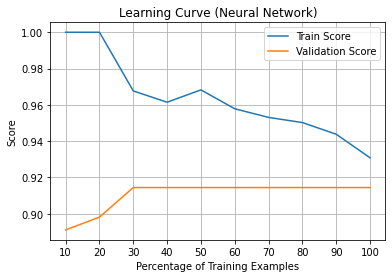

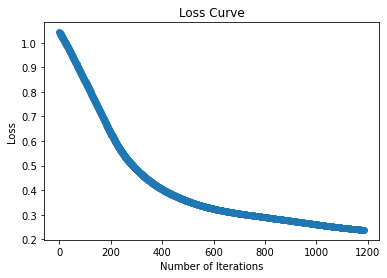

In [37]:
run_NeuralNetwork(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 7, 'learning_rate_init': 0.1}
Time to fit: 111.18539524078369
Time to predict: 0.005927562713623047
F1_score for best neural network: 1.0
Confusion matrix for GridSearch best params:
[[26  0]
 [ 0 25]]


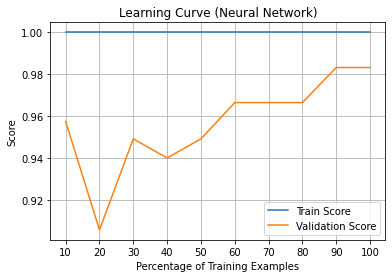

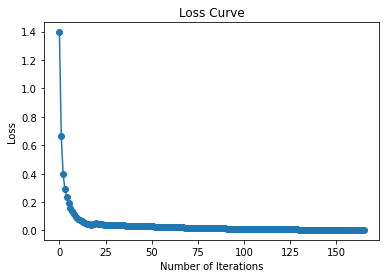

In [38]:
run_NeuralNetwork(X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 3, 'learning_rate_init': 0.1}
Time to fit: 60.62950873374939
Time to predict: 0.005314826965332031
F1_score for best neural network: 0.941085868309588
Confusion matrix for GridSearch best params:
[[25  1]
 [ 2 23]]


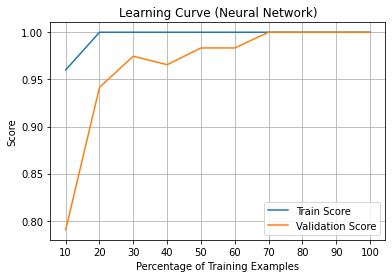

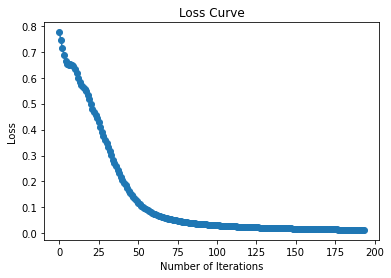

In [39]:
run_NeuralNetwork(X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 7, 'learning_rate_init': 0.0001}
Time to fit: 96.4255154132843
Time to predict: 0.005779266357421875
F1_score for best neural network: 0.9606481481481481
Confusion matrix for GridSearch best params:
[[26  0]
 [ 2 23]]


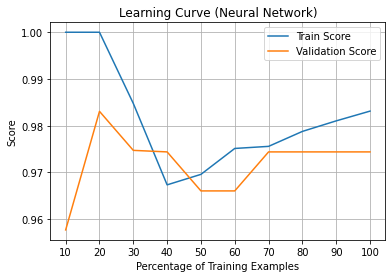

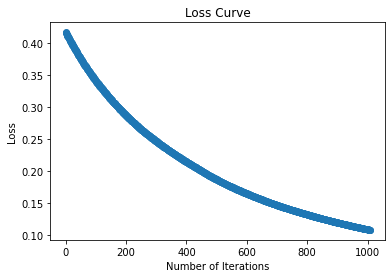

In [40]:
run_NeuralNetwork(X_GRP_train, X_GRP_test, y_GRP_train, y_GRP_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 1, 'learning_rate_init': 0.001}
Time to fit: 96.6165177822113
Time to predict: 0.003357410430908203
F1_score for best neural network: 0.980361956103196
Confusion matrix for GridSearch best params:
[[26  0]
 [ 1 24]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

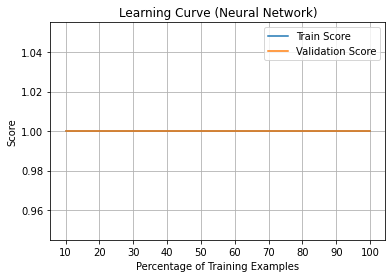

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


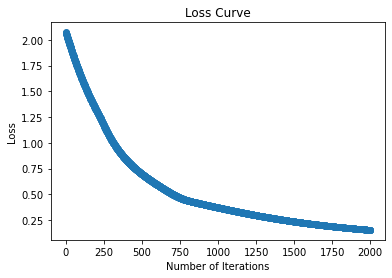

In [41]:
run_NeuralNetwork(X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test)

In [42]:
k = 6
k_means_clustering = KMeans(n_clusters=k, random_state=42)
k_means_clustering.fit_transform(X)
X_KMeans = np.append(X, k_means_clustering.fit_transform(X), 1)
X_KMeans_train, X_KMeans_test, y_KMeans_train, y_KMeans_test = train_test_split(X_KMeans, y, test_size=0.3, random_state=42, stratify=y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 3, 'learning_rate_init': 0.01}
Time to fit: 95.68817377090454
Time to predict: 0.005194187164306641
F1_score for best neural network: 0.9606481481481481
Confusion matrix for GridSearch best params:
[[26  0]
 [ 2 23]]


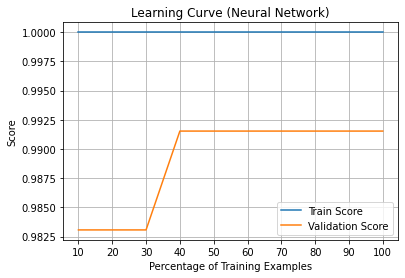

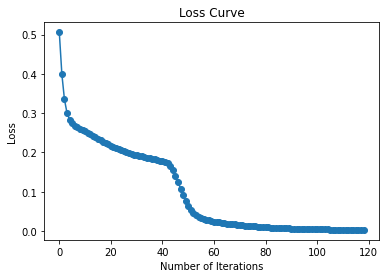

In [43]:
run_NeuralNetwork(X_KMeans_train, X_KMeans_test, y_KMeans_train, y_KMeans_test)

In [44]:
em = GaussianMixture(n_components=2, covariance_type='full')
em.fit(X)
X_EM = np.append(X, em.predict_proba(X), 1)
X_EM_train, X_EM_test, y_EM_train, y_EM_test = train_test_split(X_EM, y, test_size=0.3, random_state=42, stratify=y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 1, 'learning_rate_init': 0.001}
Time to fit: 82.64598393440247
Time to predict: 0.0022842884063720703
F1_score for best neural network: 0.9606481481481481
Confusion matrix for GridSearch best params:
[[26  0]
 [ 2 23]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

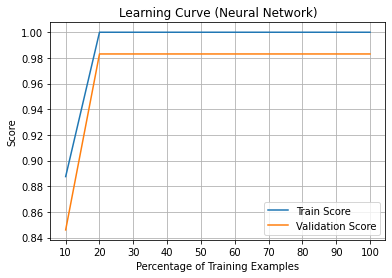

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


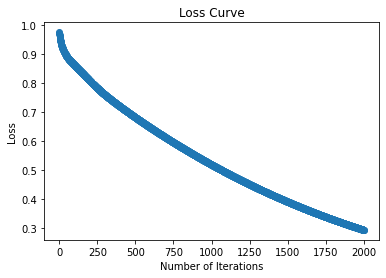

In [45]:
run_NeuralNetwork(X_EM_train, X_EM_test, y_EM_train, y_EM_test )